# Project 1



In [ ]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation


%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv")
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits
0,60.0,1.0,0.0,0.0,1.0,73.00,25.2,0,1,0,1.0,1.0,10.0,209.19,51.553645,9.0
1,4.0,0.0,0.0,0.0,0.0,110.15,17.1,0,0,0,0.0,1.0,13.0,176.46,45.405414,5.0
2,77.0,0.0,0.0,1.0,1.0,68.38,27.8,0,0,0,0.0,1.0,6.0,213.00,94.865174,8.0
3,37.0,0.0,0.0,1.0,1.0,95.08,30.1,0,0,0,1.0,1.0,12.0,161.90,84.123775,8.0
4,44.0,0.0,0.0,0.0,0.0,103.78,40.9,0,1,0,1.0,1.0,11.0,261.29,74.794596,11.0


# Part I: Logistic Regression

# 1.

In [ ]:
df.isnull().sum()

df = df.dropna()

df.isnull().sum()

df.reset_index(inplace = True)

# 2.

In [ ]:
predictor = ["age", "hypertension", "heart_disease", "ever_married", "Residence_type",
             "avg_glucose_level", "bmi", "smoking_status_smokes", "smoking_status_formerly", "reg_to_vote",
             "dog_owner", "raccoons_to_fight", "fast_food_budget_month", "income_in_k", "er_visits"]

contin = ["age", "avg_glucose_level", "bmi", "raccoons_to_fight", "fast_food_budget_month", "income_in_k", "er_visits"]



#10 K Fold Split

mse_train = []
mse_test = []
X = df[predictor]
y = df["stroke"]
Xc = df[contin]
kf = KFold(n_splits = 10, shuffle = True)

lr = LogisticRegression()

for train,test in kf.split(X):
    X_train = X.loc[train]
    X_test = X.loc[test]
    y_train = y.loc[train]
    y_test = y.loc[test]

    #Z-score
    z = StandardScaler()
    z.fit(X_train[contin])
    Xz_test = z.transform(X_test[contin])
    Xz_train = z.transform(X_train[contin])

    lr.fit(X_train, y_train)

  # metrics
    mse_test.append(mean_squared_error(y_test, lr.predict(X_test)))
    mse_train.append(mean_squared_error(y_train, lr.predict(X_train)))
print("MSE Test: ", np.mean(mse_test))
print("MSE Train: ", np.mean(mse_train))

MSE Test:  0.042188360202539556
MSE Train:  0.04225065678959294


The MSE for test is slightly lower by 0.0001 than the MSE for train. I would say there is a very small amount of overfit.

# 3.

In [ ]:
#z score
z = StandardScaler()
z.fit(Xc)
Xz = X
Xz[contin] = z.transform(Xc)

mLogit = LogisticRegression(penalty = "none")

# fit model
mLogit.fit(Xz, y)

coef = pd.DataFrame({"Coefs": mLogit.coef_[0],
                    "Predictors": predictor})
coef = coef.append({"Coefs": mLogit.intercept_[0],
                    "Predictors": "intercept"}, ignore_index = True)
coef

,Coefs,Predictors
0,1.623984,age
1,0.250496,hypertension
2,0.425367,heart_disease
3,-0.195331,ever_married
4,-0.020590,Residence_type
5,0.242319,avg_glucose_level
6,0.113410,bmi
7,0.300694,smoking_status_smokes
8,0.147751,smoking_status_formerly
9,-0.060479,reg_to_vote


# 4.

In [ ]:
predictedVals = mLogit.predict(Xz)
confusion_matrix(y, predictedVals)

array([[13634,    12],
       [  552,    24]])

The confusion matrix tells me how acurate my model predicts. The top left corner and the bottom right corner are correct prediction. This model shows that it mostly predicted that someone does not have a stroke. The left corners of my model is at value zero which means that there is no stroke. This model also shows that the prediction for not having a stroke is correct. There are more values in the top left corner than in the bottom left corner. The top left corner means that the model predicted that there is no stroke and the result is that there is no stroke.

# Part II: Data Exploration

# 1.

In [ ]:
smokein_owner = (df["smoking_status_smokes"] == 1) & (df["age"] > 50)
df2 = df.loc[smokein_owner]

df2 = df2.groupby(["dog_owner"], as_index = False)[["stroke"]].mean()
df2


,dog_owner,stroke
0,0.0,0.075988
1,1.0,0.100299


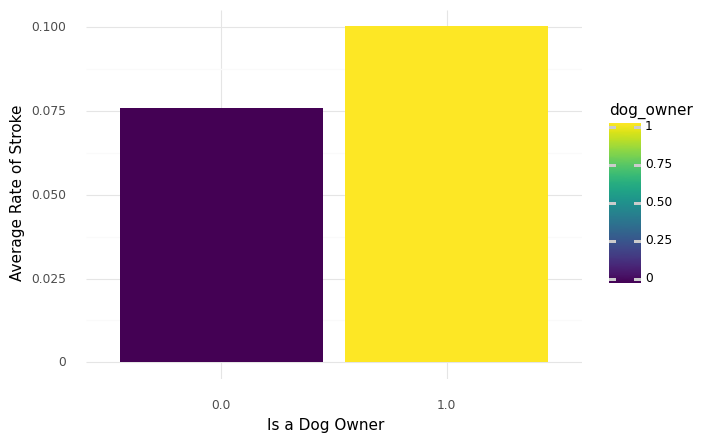

<ggplot: (8746281956853)>

In [ ]:
(ggplot(df2, aes(x = "factor(dog_owner)", y = "stroke", fill = "dog_owner")) + geom_bar(stat = "identity")
+ theme_minimal() + labs(x = "Is a Dog Owner", y = "Average Rate of Stroke"))

Dog owners over 50 do have a higher probablity of getting a stroke than non-dog owners over 50. The rate of getting a stroke for non-dog owners is 0.075988. The rate of getting a stroke for dog-owners is 0.100299. So, 0.100299 is greater than 0.075988. On average, dog owners have a higher chance of getting a stroke.

# 2.

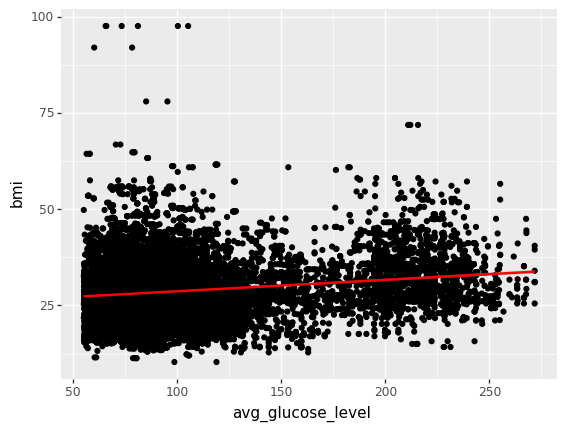

<ggplot: (8746279714937)>

In [ ]:
(ggplot(df, aes(x = "avg_glucose_level", y = "bmi")) + geom_point() + stat_smooth(method = "lm", color = "red"))

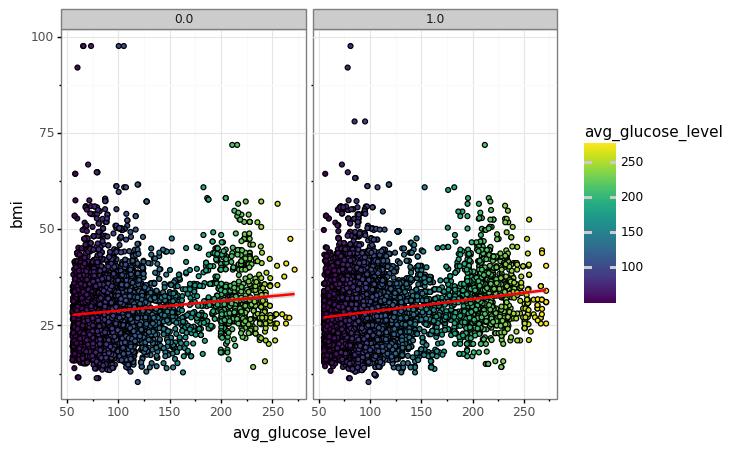

<ggplot: (8746279624657)>

In [ ]:
(ggplot(df, aes(x = "avg_glucose_level", y = "bmi", fill = "avg_glucose_level")) + geom_point()
+ stat_smooth(method = "lm", color = "red") + theme_bw() + facet_wrap("~reg_to_vote"))

The relationship between average gluecose and bmi is a positive relationship, but very close to not having a relationship. There is not much of a difference between these two variables for people who are and are not registered to vote. They both have a positive relationship that is very close to not having a relationship. There seems to be more outliers for people who are not registered to vote compare to people registered to vote.

# 3.

Accuracy Score for Income Less Than 30K:  1.0
Accuracy Score for Income 30K - 90K:  0.960959336398882
Accuracy Score for Income More Than 90K:  0.9547339322736696


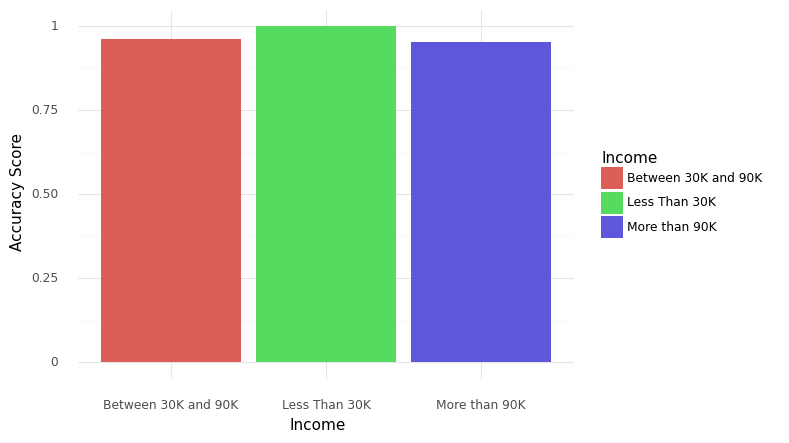

<ggplot: (8746281543649)>

In [ ]:
less_than_30 = (df["income_in_k"] > 0) & (df["income_in_k"] < 30)
df2 = df.loc[less_than_30]
Xz2 = df2[predictor]
Xz2[contin] = z.transform(Xz2[contin])
acc2 = accuracy_score(df2["stroke"], mLogit.predict(Xz2))

betwn_30_and_90 = (df["income_in_k"] >= 30) & (df["income_in_k"] <= 90)
df3 = df.loc[betwn_30_and_90]
Xz3 = df3[predictor]
Xz3[contin] = z.transform(Xz3[contin])
acc3 = accuracy_score(df3["stroke"], mLogit.predict(Xz3))

more_than_90 = (df["income_in_k"] > 90)
df4 = df.loc[more_than_90]
Xz4 = df4[predictor]
Xz4[contin] = z.transform(Xz4[contin])
acc4 = accuracy_score(df4["stroke"], mLogit.predict(Xz4))

print("Accuracy Score for Income Less Than 30K: ", acc2)
print("Accuracy Score for Income 30K - 90K: ", acc3)
print("Accuracy Score for Income More Than 90K: ", acc4)

income = ["Less Than 30K", "Between 30K and 90K", "More than 90K"]
acc_score = [acc2, acc3, acc4]
toDF = {"Income": income, "Accuracy Score": acc_score}
acc_DF = pd.DataFrame(toDF)
acc_DF
(ggplot(acc_DF, aes(x = "Income", y = "Accuracy Score", fill = "Income")) + geom_bar(stat = "identity") + theme_minimal())

Yes, my logestic regression model seems to be accurate for people who make less than 30k, between 30-90k, or over 90k. The most accurate model is for people whose income is less than 30K. People whose income less than 30K have a higher chance of getting a stroke due to unhealthy food since healthier food is typically more expensive. People who make between 30K and 90K or even more than 90K have high reports of getting stroke due to affordable healthcare.

# 4.

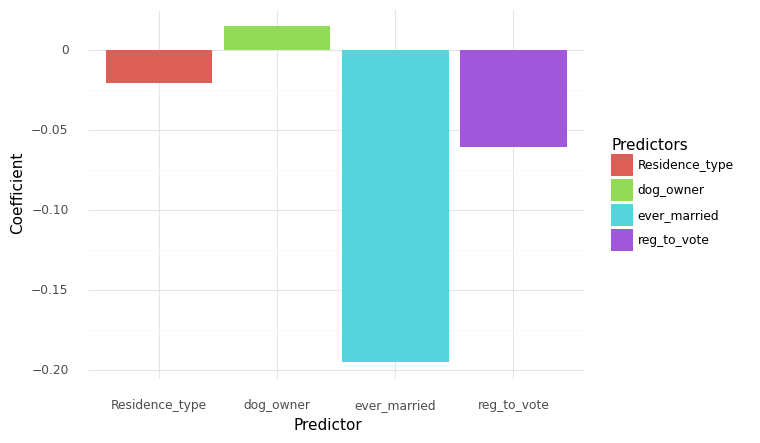

<ggplot: (8746281544721)>

In [ ]:
coef["Predictors"]
coef1 = coef.iloc[[10, 4, 3, 9]]

(ggplot(coef1, aes(x = "Predictors", y = "Coefs", fill = "Predictors")) + geom_bar(stat = "identity") + theme_minimal()
+ labs(x = "Predictor", y = "Coefficient"))

The variable with the strongest predictor is dog_owner. dog_owner is the only coefficient that is positive while the other coefficients are negative. The coefficient value for dog_owner is 0.015057 while the other predictors are less than 0.

# 5.

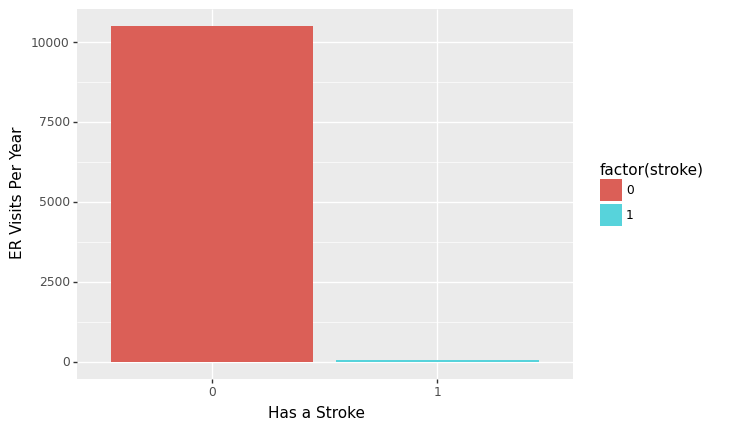

<ggplot: (8746279623077)>

In [ ]:
df["er_visits_per_year"] = df["er_visits"]/df["age"]
df.head()
(ggplot(df, aes(x = "factor(stroke)", y = "er_visits_per_year", fill = "factor(stroke)")) + geom_bar(stat = "identity")
+ labs(x = "Has a Stroke", y = "ER Visits Per Year"))

Yes there is a huge difference in er visits for smoke and non-smoke patients. Based on this graph the Has a Stroke Value of 0 which means no stroke has over 10,000 er visits per year. The Has a Stroke value of 1 which means there is a stroke has almost no er visits per year. The patients who have no stoke visits the er more often than patients with a stoke per year. It seems like that the patients who visit the er without a stoke per year visit the er for other health reasons.  

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/Anthony_Walujono_Project1.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "Anthony_Walujono_Project1.ipynb"
#!jupyter nbconvert --to PDF "HW1_Anthony_Walujono.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
texlive is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit

In [ ]:
!jupyter nbconvert --to PDF "Anthony_Walujono_Project1.ipynb"

[NbConvertApp] Converting notebook Anthony_Walujono_Project1.ipynb to PDF
[NbConvertApp] Support files will be in Anthony_Walujono_Project1_files/
[NbConvertApp] Making directory ./Anthony_Walujono_Project1_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project1_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project1_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project1_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project1_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project1_files
[NbConvertApp] Writing 54480 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 348491 bytes to Anthony_Walujono_Project1.pdf
